In [0]:
import random
import matplotlib.pyplot as plt

In [0]:
# number of columns (x) and number of rows (y)
nc, nr = 20,20
# initialize with random values 0 or 1
states = [[int(random.random()>0.5) for x in range(nc)] for y in range(nr)]

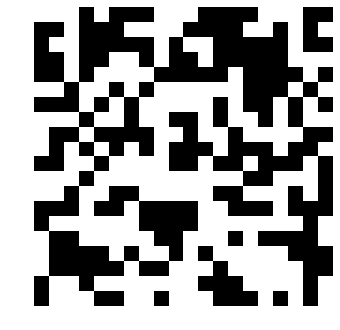

In [3]:
# display as image
plt.axis('off')
plt.grid(False)
plt.imshow(states)

Moore neighbourhood: https://en.wikipedia.org/wiki/Moore_neighborhood

In [0]:
# for a given cell coordinate (x,y) return a list of its 8 neighbours
# topology = torus, wraps around borders top-bottom and left-right
def get_neighbours(x,y):
  neighbours = []
  directions = [(1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)]
  for d in directions:
    ox = (x+d[0]) % nc
    oy = (y+d[1]) % nr
    neighbours.append(states[oy][ox])
  return neighbours

In [0]:
# method to calculate the next step from a given state by applying the neighbour rules
def next_gen(states):
    # Any live cell with fewer than two live neighbours dies, as if by underpopulation.
    # Any live cell with two or three live neighbours lives on to the next generation.
    # Any live cell with more than three live neighbours dies, as if by overpopulation.
    # Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
    # https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
    
    new_states = [[v for v in states[i]] for i in range(nr)]
    
    for r in range(nr):
      for c in range(nc):
        cell = states[r][c]
        nbs = get_neighbours(c,r)
        number_of_ones = nbs.count(1)
        if cell==1:
          if number_of_ones<2:
            new_states[r][c] = 0
          elif number_of_ones == 2 or number_of_ones == 3:
            new_states[r][c] = 1
          else:
            new_states[r][c] = 0
        else:
          if number_of_ones == 3:
            new_states[r][c] = 1

    return new_states

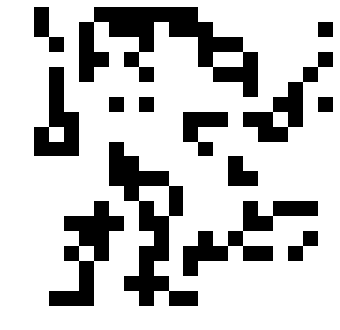

In [6]:
#@title Frame { run: "auto", form-width: "40%" }
iterations = 0 #@param {type:"slider", min:0, max:10, step:1}

states = [[int(random.random()>0.5) for x in range(nc)] for y in range(nr)]

for i in range(iterations):
  states = next_gen(states)
  
plt.axis('off')
plt.grid(False)
plt.imshow(states)

In [7]:
states[:5][:5]

[[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]]